In [1]:
from keras import layers, models, backend
from keraspp.skeras import plot_loss, plot_acc
import matplotlib.pyplot as plt
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
def Conv2D(filter,kernel_size, padding='same', activation='relu'):
    return layers.Conv2D(filter, kernel_size, padding=padding, activation=activation)


In [3]:
class AE(models.Model):
    def __init__(self, org_shape):
        print(org_shape)

        original = layers.Input(shape=org_shape)
        
        x = Conv2D(4, (3, 3))(original) # 28, 28, 4
        x = layers.MaxPooling2D((2, 2), padding='same')(x) # 14, 14, 4
        
        x = Conv2D(8, (3,3))(x) # 8, 14, 14
        x = layers.MaxPooling2D((2, 2), padding='same')(x) # 7, 7, 8
        
        z = Conv2D(1, (7, 7))(x) # 7, 7, 1
        
        y = Conv2D(16, (3, 3))(z) # 7, 7, 16
        y = layers.UpSampling2D((2, 2))(y) # 14, 14, 16
        
        y = Conv2D(8, (3, 3))(y) # 14, 14, 8
        y = layers.UpSampling2D((2, 2))(y) # 28, 28,8
        
        y = Conv2D(4, (3, 3))(y) # 28, 28, 4
        decoded = Conv2D(1, (3, 3), activation='sigmoid')(y) # 28, 28, 1
        
        super().__init__(original, decoded)
        self.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
        
        self.summary()

In [4]:
from keras import datasets
class DATA():
    def __init__(self):
        num_classes = 10
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

        print(x_train.shape)
        print(x_train.shape[1:])
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_rows)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_rows)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_rows, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_rows, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train = x_train / 255.0
        x_test = x_test / 255.0


        y_train = np_utils.to_categorical(y_train, num_classes)
        y_test = np_utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [5]:
def show_ae(autoencoder, data):
    x_test = data.x_test
    decoded_imgs = autoencoder.predict(x_test)
    print('decoded_imgs.shape', decoded_imgs.shape, 'data.s_test.shape',x_test.shape)
    if backend.image_data_format() == 'channel first':
        N, n_ch, n_i, n_j = x_test.shape
    else:
        N, n_i, n_j, n_ch = x_test.shape
    
    x_test = x_test.reshape(N, n_i, n_j)
    decoded_imgs = decoded_imgs.reshape(decoded_imgs.shape[0], n_i, n_j)
    print('reshaped decoded_imgs.shape', decoded_imgs.shape, 'reshaped data.s_test.shape',x_test.shape)

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    plt.show()

In [6]:
data = DATA()
autoencoder = AE(data.input_shape)

history = autoencoder.fit(data.x_train, data.x_train, epochs=10, batch_size=128, shuffle=True, validation_split=0.2)


(60000, 28, 28)
(28, 28)
(28, 28, 1)
Model: "ae_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 1)           393       
_________________________________________________________________
conv2d_4 (Conv2D)        

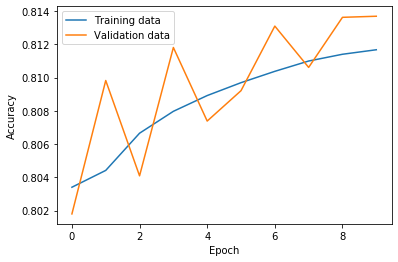

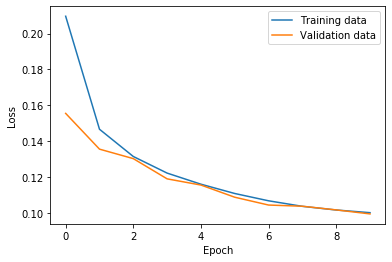

In [7]:

plot_acc(history)
plt.show()

plot_loss(history)
plt.show()



decoded_imgs.shape (10000, 28, 28, 1) data.s_test.shape (10000, 28, 28, 1)
reshaped decoded_imgs.shape (10000, 28, 28) reshaped data.s_test.shape (10000, 28, 28)


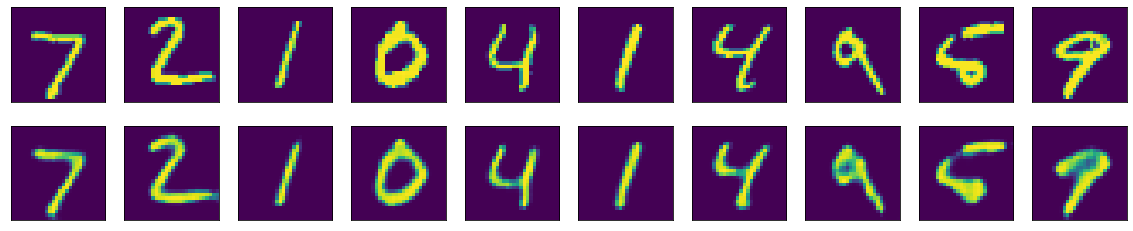

In [8]:
show_ae(autoencoder, data)
plt.show()

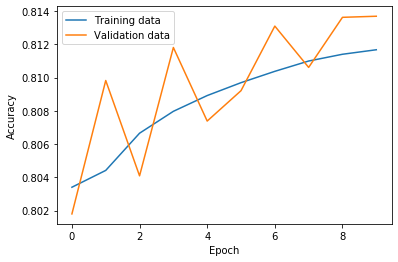

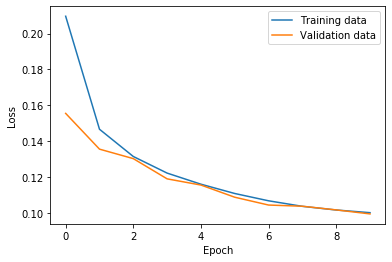

In [9]:

plot_acc(history)
plt.show()

plot_loss(history)
plt.show()



decoded_imgs.shape (10000, 28, 28, 1) data.s_test.shape (10000, 28, 28, 1)
reshaped decoded_imgs.shape (10000, 28, 28) reshaped data.s_test.shape (10000, 28, 28)


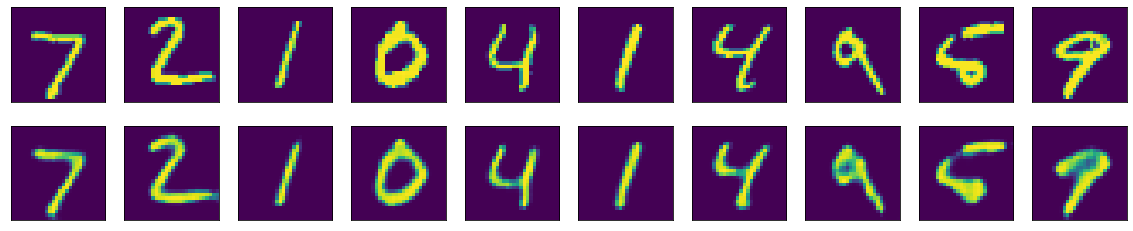

In [10]:
show_ae(autoencoder, data)
plt.show()